<a href="https://colab.research.google.com/github/Marvel280904/W9---DataMining---Mavel/blob/main/%5BQuestion%5D_Exercise_Week_9_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Marvel280904/W9---DataMining---Mavel/refs/heads/main/property_dataset.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [ ]:
# 1. cek missing value
df.isna().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [ ]:
# 2. cek persentase nilai NaN di setiap kolom
percentage_missing = df.isnull().mean() * 100
percentage_missing

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [ ]:
from sklearn.impute import SimpleImputer
# gunakan SimpleImputer dengan strategi 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# menerapkan imputer ke seluruh dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
# cek missing value
df_imputed.isna().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [ ]:
# drop Nama Daerah

df = df_imputed.drop('Nama Daerah', axis=1)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [ ]:
# label encoding pada semua kolom dengan tipe data 'object' atau 'category'
le = LabelEncoder()
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])

df['Terjual/Belum'] = df['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df['Area Category'] = df['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [ ]:
# untuk melihat values (" ")
df.loc[df['Harga Penawaran (dari Owner)'] == " "]

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
41,3,180.0,240.0,5.0,5.0,2.0,,1,2,2,3


In [ ]:
# mengganti values (" ") dengan "10500000000".
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(' ', '10500000000')

# mengganti "10.500.000.000,00" dengan "10500000000"
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('10.500.000.000,00', '10500000000')

check the data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [ ]:
# Convert object column(s) to int
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=['Area Category','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [ ]:
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

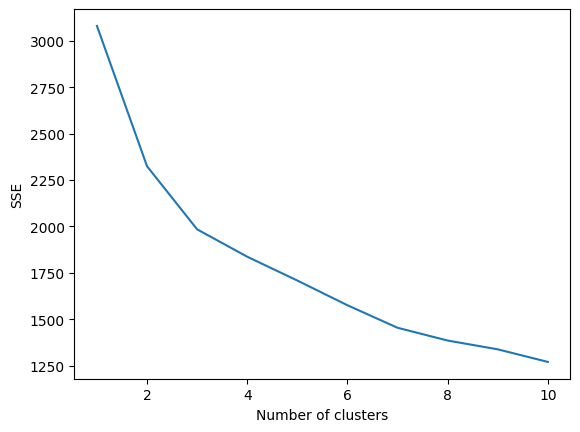

In [ ]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
kmeans.fit(df)
y_pred = kmeans.labels_
y_pred

array([0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2,

In [ ]:
numeric_cols = ['Area Category','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)']

# Inverse transform numeric columns to their original scale
df_scaled = pd.DataFrame(
    sc.inverse_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df_imputed.index
)

# Menambahkan hasil clustering ke dalam DataFrame
df_scaled['KMeans'] = y_pred

# Display the first few rows of the DataFrame
df_scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [ ]:
def mode(series):
    return series.mode().iloc[0]

# Define aggregation rules: mode for categorical columns
agg_rules = {
    'Area Category': mode,
    'Terjual/Belum': mode,
    'Arah Hadap Rumah': mode,
    'Posisi Rumah': mode,
    'Lebar Jalan Depan Rumah (ROW)': mode
}

# Group by clusters and aggregate
cluster_summary = df_scaled.groupby('KMeans').agg(agg_rules)
cluster_summary

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
KMeans,,,,,
0,2.0,1.0,3.0,2.0,2.0
1,1.0,1.0,3.0,2.0,3.0
2,3.0,1.0,3.0,2.0,2.0


In [ ]:
# Define aggregation rules: mean for continuous columns
agg_rules = {
    'Luas Tanah (m2)': 'mean',
    'Luas Bangunan (m2)': 'mean',
    'Jumlah Kamar': 'mean',
    'Jumlah Kamar Mandi': 'mean',
    'Tingkat/Lantai ': 'mean',
    'Harga Penawaran (dari Owner)': 'mean'
}

# Group by clusters and aggregate
cluster_summary = df_scaled.groupby('KMeans').agg(agg_rules)
cluster_summary

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
KMeans,,,,,,
0,187.378205,243.814103,4.634615,3.673077,2.019231,3.544236e+09
1,570.680000,642.220000,6.260000,5.300000,1.980000,1.675630e+10
2,118.980392,117.588235,2.754902,1.862745,1.500000,1.506754e+09


In [ ]:
cluster_counts = df_scaled['KMeans'].value_counts().sort_index()
cluster_counts

,count
KMeans,
0,156
1,50
2,102


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Plot the dendrogram to help determine the number of clusters, using the 'max' method.

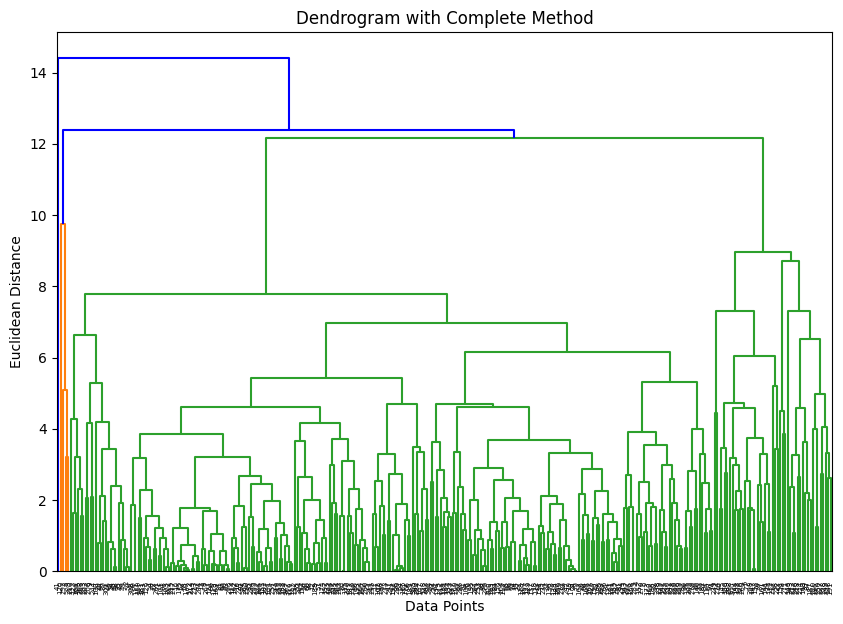

In [ ]:
n_clusters = 3
linked = linkage(df, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters equal to the number of clusters from the K-Means model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(df)

df_scaled['agglo'] = y_hc

df_scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,1
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe with the same criteria as the previous summary

In [ ]:
def mode(series):
    return series.mode().iloc[0]

# Define aggregation rules: mode for categorical columns
agg_rules = {
    'Area Category': mode,
    'Terjual/Belum': mode,
    'Arah Hadap Rumah': mode,
    'Posisi Rumah': mode,
    'Lebar Jalan Depan Rumah (ROW)': mode
}

# Group by clusters and aggregate
cluster_summary = df_scaled.groupby('agglo').agg(agg_rules)
cluster_summary

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
agglo,,,,,
0,2.0,1.0,3.0,2.0,2.0
1,2.0,1.0,3.0,2.0,2.0
2,3.0,1.0,3.0,2.0,2.0


In [ ]:
# Define aggregation rules: mean for continuous columns
agg_rules = {
    'Luas Tanah (m2)': 'mean',
    'Luas Bangunan (m2)': 'mean',
    'Jumlah Kamar': 'mean',
    'Jumlah Kamar Mandi': 'mean',
    'Tingkat/Lantai ': 'mean',
    'Harga Penawaran (dari Owner)': 'mean'
}

# Group by clusters and aggregate
cluster_summary = df_scaled.groupby('agglo').agg(agg_rules)
cluster_summary

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
agglo,,,,,,
0,511.848485,572.484848,6.030303,4.909091,1.954545,1.383303e+10
1,163.090361,218.156627,4.301205,3.451807,2.048193,3.094804e+09
2,119.026316,107.131579,2.697368,1.723684,1.289474,1.548517e+09


In [ ]:
cluster_counts = df_scaled['agglo'].value_counts().sort_index()
cluster_counts

,count
agglo,
0,66
1,166
2,76


**Hierarchical Visualization**

Single Linkage

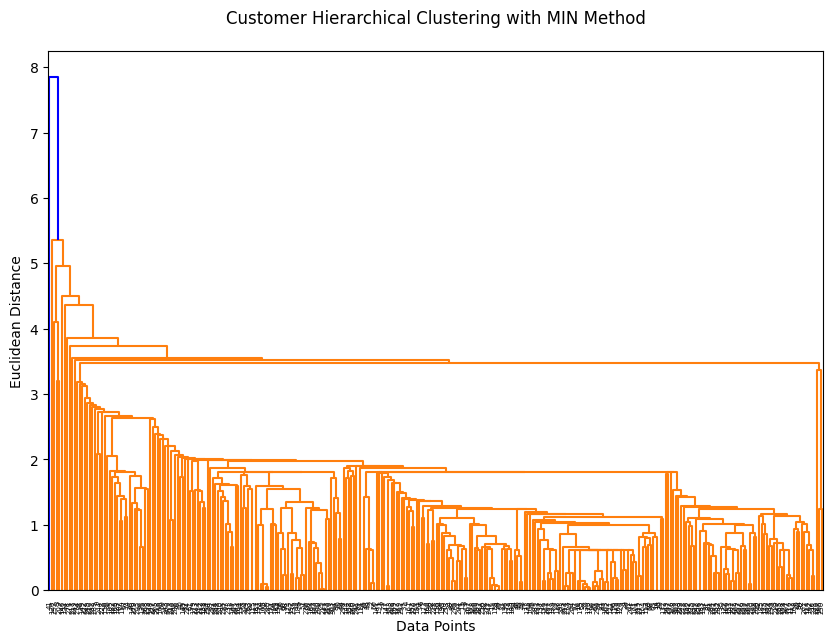

In [ ]:
import scipy.cluster.hierarchy as hie

# Buat linkage matrix
linked = linkage(df, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold + 1,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='blue',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

complete linkage

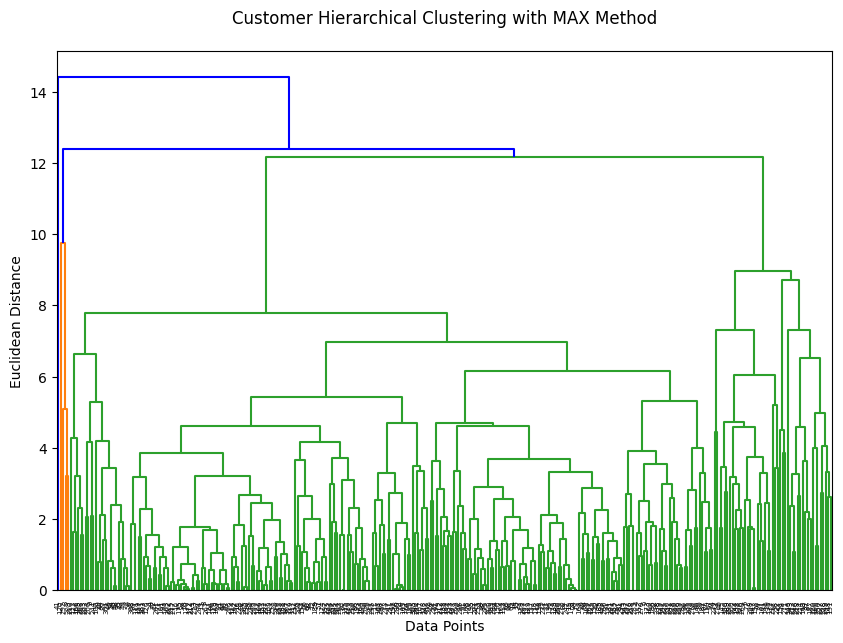

In [ ]:
# Max Distance
n_clusters = 3
linked = linkage(df, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

average linkage

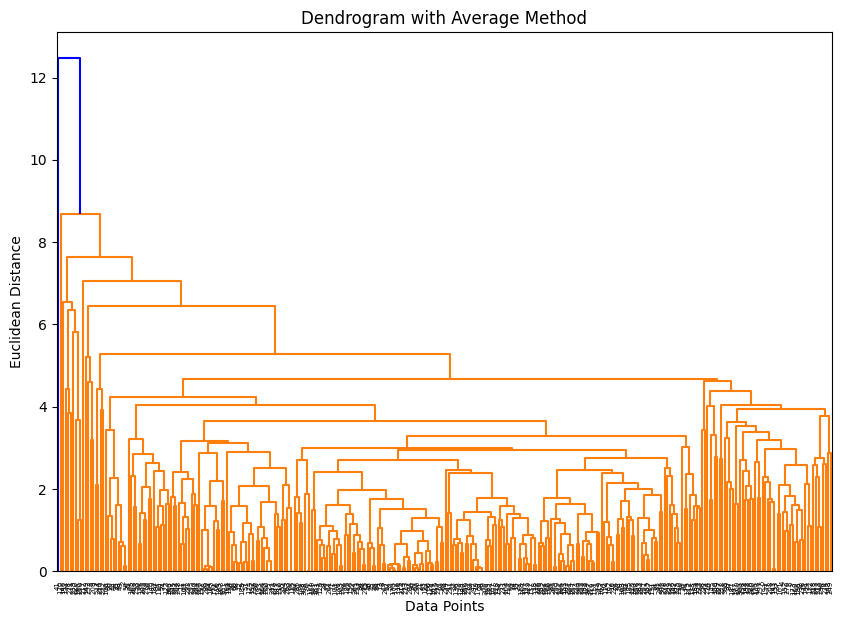

In [ ]:
n_clusters = 3
linked = linkage(df, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold + 1,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

ward linkage

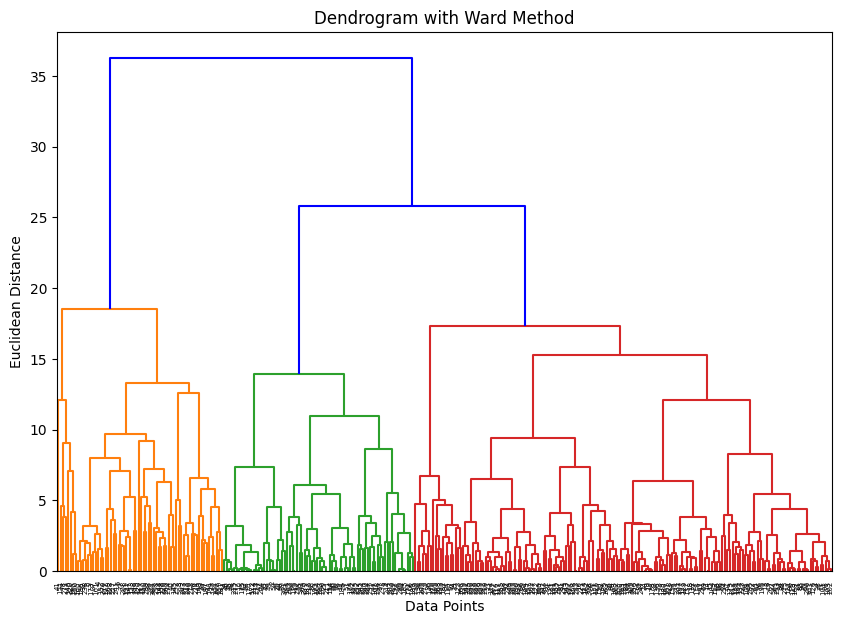

In [ ]:
n_clusters = 3
linked = linkage(df, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()